# Create fake user data

This notebook generates fake user data with long-tail distributions.

In [185]:
!pip install faker
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [186]:
DATA_DIR="../../data/recommendations/"
ratings_path = 'ml-latest-small/ratings.csv'
users_path = 'ml-latest-small/users.csv'
ratings_df = pd.read_csv(os.path.join(DATA_DIR, ratings_path))

In [187]:
users_df = ratings_df[['userId']].drop_duplicates().reset_index(drop=True)
users_df.head()

,userId
0,1
1,2
2,3
3,4
4,5


In [188]:
# Generate a long-tail probability distribution
probability_distribution = np.random.exponential(scale=1, size=users_df.size)
probability_distribution = probability_distribution / probability_distribution.sum()
print("sum", probability_distribution.sum())
print("mean", probability_distribution.mean())
print("max", probability_distribution.max())
print("min", probability_distribution.min())

sum 1.0
mean 0.001639344262295082
max 0.011388062974535075
min 1.9379369262073935e-07


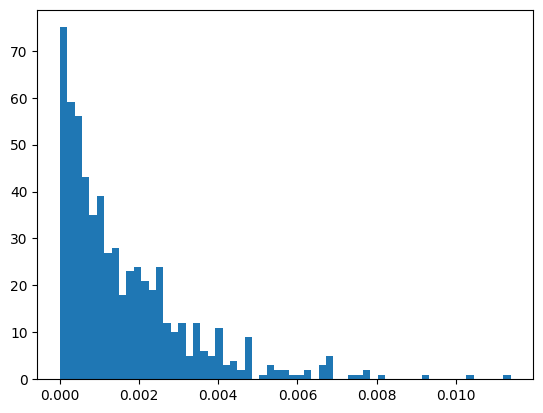

In [189]:
# Plot the data to visualize the skew
plt.hist(probability_distribution, bins=int(users_df.size/10))
plt.show()

In [191]:
from faker import Faker

fake = Faker()
NUM_USERS = users_df['userId'].count()

cities = [fake.unique.city() for _ in range(0, int(users_df.size / 5))]
post_codes = {city: [fake.unique.postcode() for _ in range(0, 11)] for city in cities}

users_df['city'] = np.random.choice(cities, size=NUM_USERS, p=np.random.shuffle(probability_distribution))
users_df['post_code'] = [np.random.choice(post_codes[city]) for city in users_df['city']]
                                   
users_df

,userId,city,post_code
0,1,Port Jeremyfurt,80981
1,2,South David,74801
2,3,Port Sarahview,54502
3,4,Jonathanhaven,68729
4,5,Cynthiaport,42845
...,...,...,...
605,606,Victoriachester,97199
606,607,New Marktown,59434
607,608,Lake Stephenview,08153
608,609,Michaelaview,45751
